# k-Means Cluster Analysis

## Iris Data Set 
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attribute: class of iris plant. 

This is an exceedingly simple domain. 

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

In [59]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [112]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# standardize clustering variables to have mean=0 and sd=1
clustervar = X.copy()
for col in clustervar.columns:
    clustervar[col] = preprocessing.scale(clustervar[col].astype('float64'))

y = pd.Series(iris.target)
clus_train, clus_test = train_test_split(clustervar, test_size=0.3)

In [113]:
clustervar.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [114]:
clus_train.shape, clus_test.shape

((105, 4), (45, 4))

In [115]:
# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
import numpy as np
clusters = range(1,10)
meandist = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

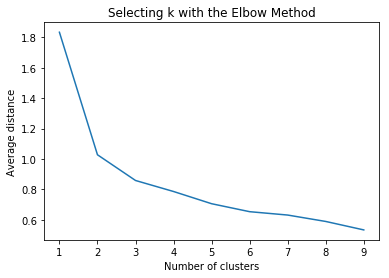

In [116]:
import matplotlib.pylab as plt

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [117]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

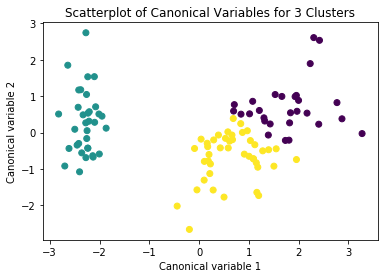

In [118]:
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()


In [119]:
"""
BEGIN multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(inplace=True)
# del clus_train['level_0']
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 12: 1,
 13: 1,
 15: 1,
 16: 1,
 17: 1,
 19: 1,
 20: 1,
 22: 1,
 23: 1,
 25: 1,
 26: 1,
 27: 1,
 32: 1,
 34: 1,
 35: 1,
 36: 1,
 39: 1,
 40: 1,
 42: 1,
 43: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 0,
 51: 0,
 52: 0,
 54: 2,
 56: 0,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 0,
 66: 2,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 2,
 74: 2,
 75: 2,
 77: 0,
 78: 2,
 81: 2,
 82: 2,
 83: 2,
 84: 2,
 86: 0,
 90: 2,
 91: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 2,
 97: 2,
 99: 2,
 101: 2,
 102: 0,
 103: 0,
 104: 0,
 106: 2,
 108: 2,
 109: 0,
 111: 2,
 114: 2,
 116: 0,
 117: 0,
 118: 0,
 119: 2,
 120: 0,
 121: 2,
 122: 0,
 123: 2,
 124: 0,
 125: 0,
 126: 2,
 127: 2,
 128: 0,
 129: 0,
 130: 0,
 131: 0,
 132: 0,
 134: 2,
 135: 0,
 136: 0,
 137: 0,
 138: 2,
 140: 0,
 142: 2,
 144: 0,
 146: 2}

In [120]:
# convert newlist dictionary to a dataframe
newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus

,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
12,1


In [121]:
# rename the cluster assignment column
newclus.columns = ['cluster']

In [122]:
# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

2    43
1    34
0    28
Name: cluster, dtype: int64

In [123]:
# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
              index  sepal_length  sepal_width  petal_length  petal_width
cluster                                                                  
0        108.535714      1.284668     0.164296      1.061304     1.001887
1         24.000000     -1.053923     0.821072     -1.319530    -1.254974
2         91.813953      0.074298    -0.781496      0.434789     0.371712


In [125]:
# validate clusters in training data 
class_data = clustervar['petal_width']
# split GPA data into train and test sets
class_train, gpa_test = train_test_split(class_data, test_size=.3, random_state=123)
class_train1 = pd.DataFrame(class_train)
class_train1.reset_index(inplace=True)
merged_train_all = pd.merge(class_train1, merged_train, on='index')
merged_train_all

,index,petal_width_x,sepal_length,sepal_width,petal_length,petal_width_y,cluster
0,114,1.579429,-0.052506,-0.587764,0.762759,1.579429,2
1,136,1.579429,0.553333,0.800654,1.047087,1.579429,0
2,19,-1.181504,-0.900681,1.726266,-1.284407,-1.181504,1
3,23,-0.918558,-0.900681,0.569251,-1.170675,-0.918558,1
4,9,-1.444450,-1.143017,0.106445,-1.284407,-1.444450,1
5,86,0.396172,1.038005,0.106445,0.535296,0.396172,0
6,91,0.264699,0.310998,-0.124958,0.478430,0.264699,2
7,101,0.922064,-0.052506,-0.819166,0.762759,0.922064,2
8,65,0.264699,1.038005,0.106445,0.364699,0.264699,0
9,124,1.185010,1.038005,0.569251,1.103953,1.185010,0


In [127]:
sub1 = merged_train_all[['petal_width_x', 'cluster']].dropna()

In [129]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='petal_width_x ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for GPA by cluster')
m1 = sub1.groupby('cluster').mean()
print(m1)

print('standard deviations for GPA by cluster')
m2 = sub1.groupby('cluster').std()
print(m2)

mc1 = multi.MultiComparison(sub1['petal_width_x'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:          petal_width_x   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sat, 17 Feb 2018   Prob (F-statistic):           2.61e-30
Time:                        21:14:06   Log-Likelihood:                -32.844
No. Observations:                  75   AIC:                             71.69
Df Residuals:                      72   BIC:                             78.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9471      0.084     

Finally, we specified cluster model. The analysis of variance summary table indicates that the clusters differed significantly on GPA. When we examine the means, we find that not surprisingly, petal length in cluster 1, the most significant variable, had the lowest GPA, and irises in cluster 0, had the highest GPA. The tukey test shows that the clusters differed significantly in mean GPA, although the difference between cluster 0 and cluster 2 were smaller. 